# Supervised ML Task 
# Author- Anmol Kumar
# The Spark Foundation
# Grip july 2021 Batch
# Data Science and Business Analytics Intern
# Task 1 : Prediction using suervised ML

### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

from sklearn import preprocessing 


In [2]:
url = "http://bit.ly/w-data"

data = pd.read_csv(url)

In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


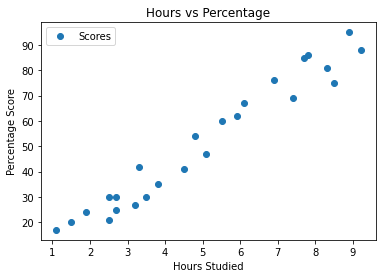

In [38]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (25, 2)


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [25]:
# training dataset and labels
train_input = np.array(data.Hours[0:20]).reshape(20,1)
train_output  = np.array(data.Scores[0:20]).reshape(20,1)

# valid dataset and labels
test_input = np.array(data.Hours[20:26]).reshape(5,1)
test_output  = np.array(data.Scores[20:26]).reshape(5,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (20, 1)
Train Output  Shape = (20, 1)
Test Input Shape = (5, 1)
Test Output  Shape = (5, 1)


In [26]:
# using sklearn library
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(train_input, train_output)
print(linear_regressor.score(train_input, train_output))

0.9554562450839484


In [27]:
predicted_value = linear_regressor.predict(test_input)
predicted_value

array([[28.73632549],
       [48.72913629],
       [39.2087502 ],
       [68.72194709],
       [77.29029458]])

In [28]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(predicted_value, test_output)

In [29]:
error

35.18429566473712

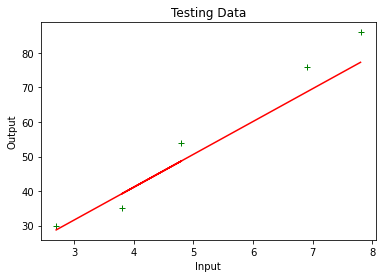

In [52]:
plt.plot(test_input, test_output, '+', color = 'green')
plt.plot(test_input, linear_regressor.predict(test_input), '-', color= 'red')
plt.title("Testing Data")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [53]:
x = float(input("Enter Hours : "))
x= np.array([x]).reshape(1,1)
prediction = linear_regressor.predict(x)

Enter Hours : 9.25


In [54]:
prediction

array([[91.09485442]])

# SECOND MODEL USING TRAIN TEST SPLIT

In [43]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [44]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


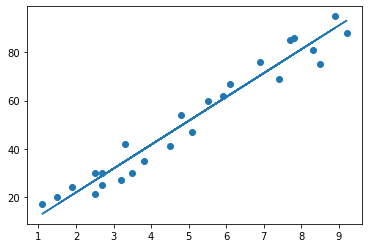

In [45]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [46]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [47]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [50]:
# You can also test with your own data
hours = 9.25

own_pred = regressor.predict(np.array([hours]).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [57]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Absolute Error:', 
      np.sqrt(metrics.mean_absolute_error(y_test, y_pred))) 
print('R-2 Score:', 
      metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Absolute Error: 2.0454485813637495
R-2 Score: 0.9454906892105356


# 3rd model Supervised ML 

# <font color = "green">Linear Regression</font>

## Forward Propogation

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [62]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

Defining Cost Function
Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5

where y are the actual or true values and f(x) are the predicted values.

In [63]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [64]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [65]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [70]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 1628.5394602467627


<Figure size 432x288 with 0 Axes>

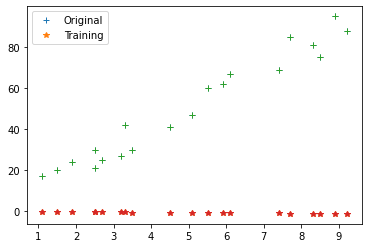

Iteration = 2, Loss = 756.8625222642875


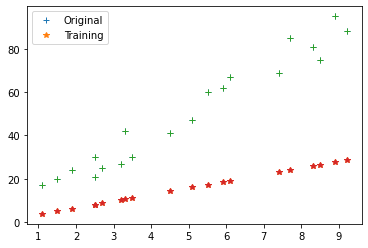

Iteration = 3, Loss = 355.94235642800174


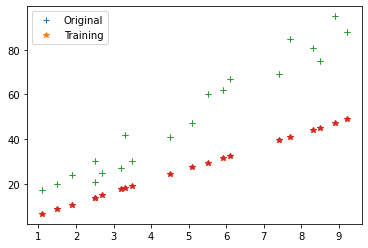

Iteration = 4, Loss = 171.5423237347894


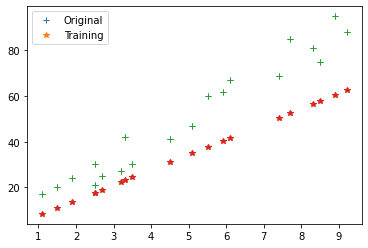

Iteration = 5, Loss = 86.72868353745346


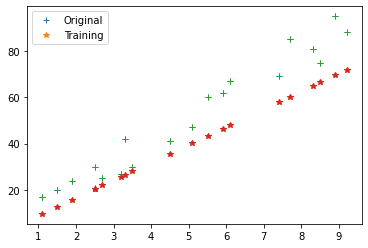

Iteration = 6, Loss = 47.71886634965804


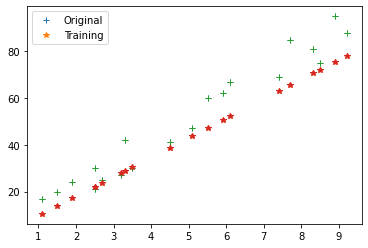

Iteration = 7, Loss = 29.77608734617163


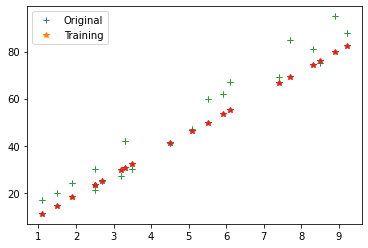

Iteration = 8, Loss = 21.52289599552798


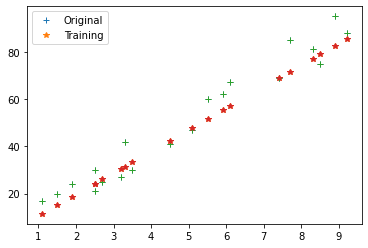

Iteration = 9, Loss = 17.72634138490012


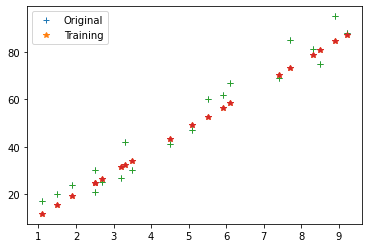

Iteration = 10, Loss = 15.979577161280726


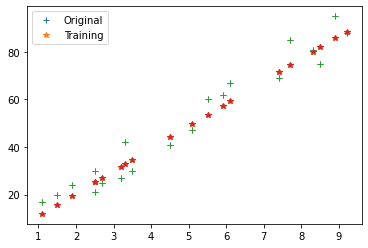

Iteration = 11, Loss = 15.175597069128838


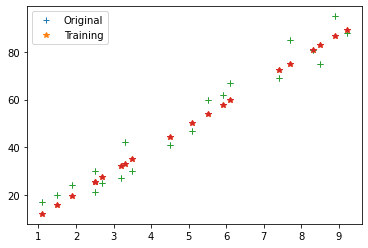

Iteration = 12, Loss = 14.805244027724395


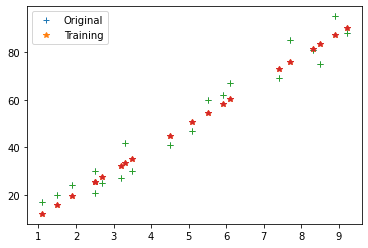

Iteration = 13, Loss = 14.6343360371746


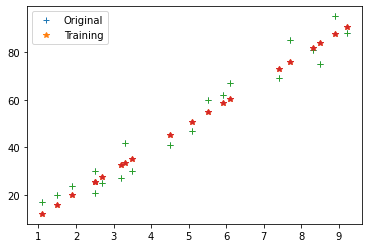

Iteration = 14, Loss = 14.55516328869098


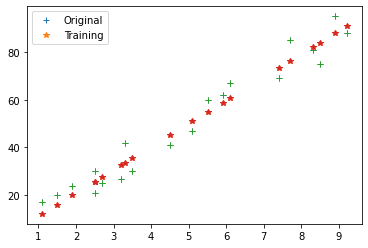

Iteration = 15, Loss = 14.518185663192066


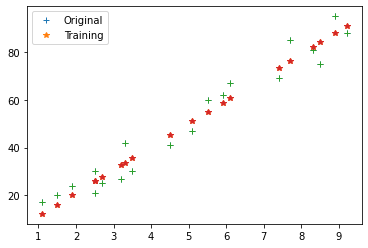

Iteration = 16, Loss = 14.50061764095857


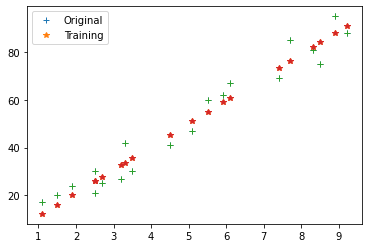

Iteration = 17, Loss = 14.491979227570127


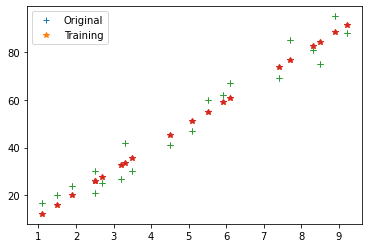

Iteration = 18, Loss = 14.48745023877311


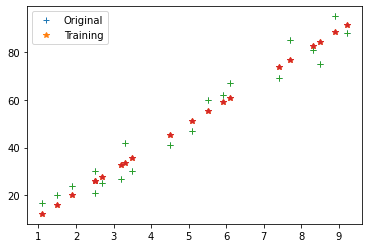

Iteration = 19, Loss = 14.484813666579663


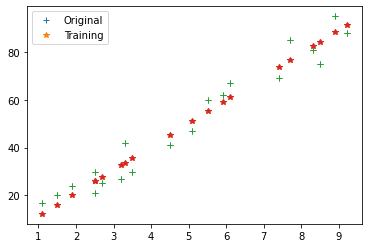

Iteration = 20, Loss = 14.483049809377055


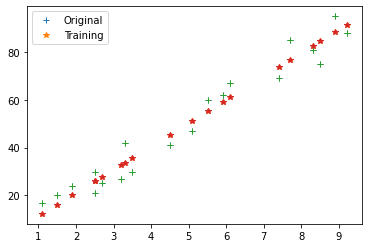

Iteration = 21, Loss = 14.481689655351044


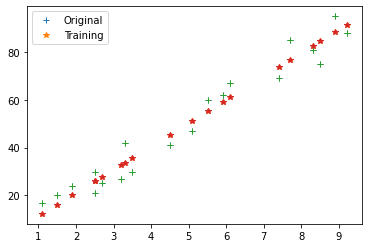

Iteration = 22, Loss = 14.480517477298926


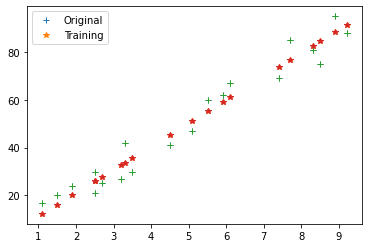

Iteration = 23, Loss = 14.479434043923082


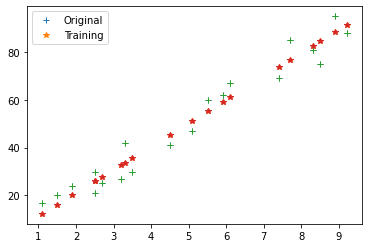

Iteration = 24, Loss = 14.478393705157155


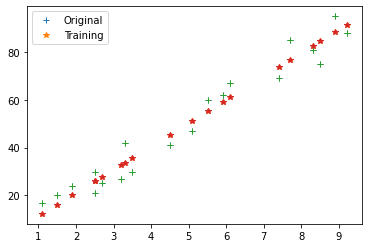

Iteration = 25, Loss = 14.477375455156064


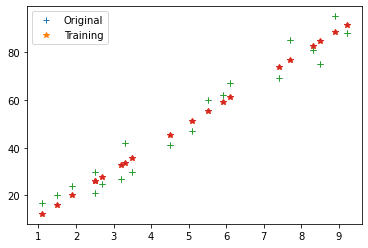

Iteration = 26, Loss = 14.47636962299137


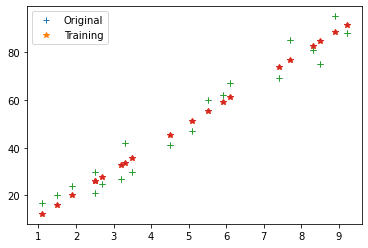

Iteration = 27, Loss = 14.475371751162161


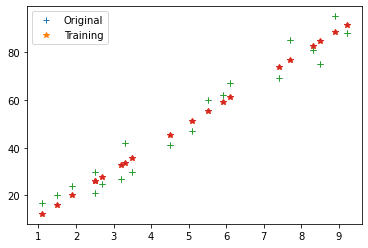

Iteration = 28, Loss = 14.474379780073832


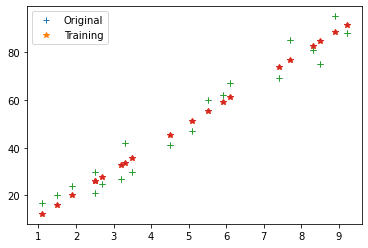

Iteration = 29, Loss = 14.473392753065479


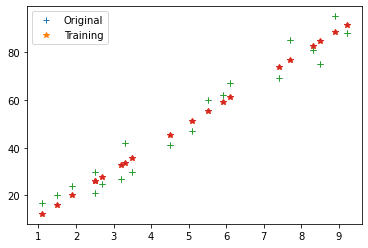

Iteration = 30, Loss = 14.472410220799366


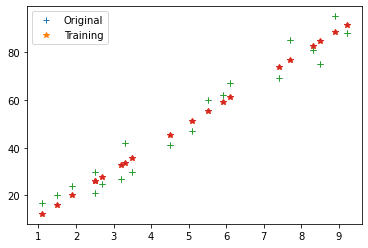

Iteration = 31, Loss = 14.471431967315265


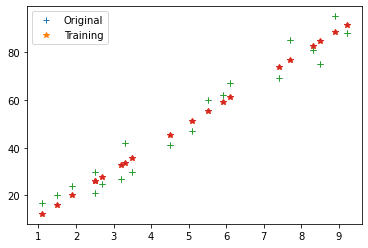

Iteration = 32, Loss = 14.470457884031608


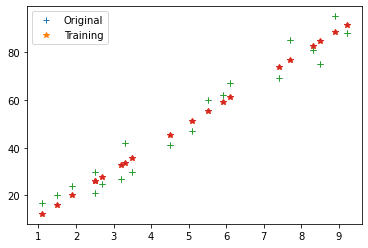

Iteration = 33, Loss = 14.469487911793369


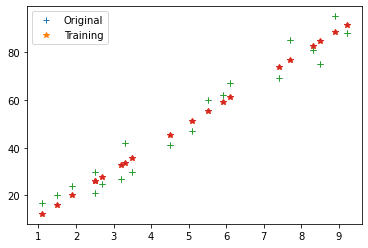

Iteration = 34, Loss = 14.468522014217296


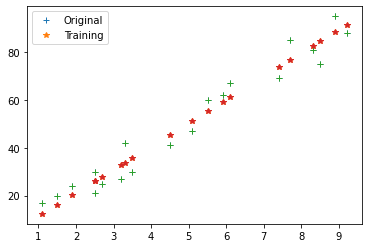

Iteration = 35, Loss = 14.467560165432241


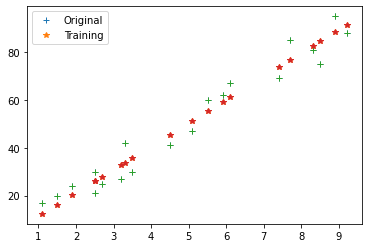

Iteration = 36, Loss = 14.466602344440204


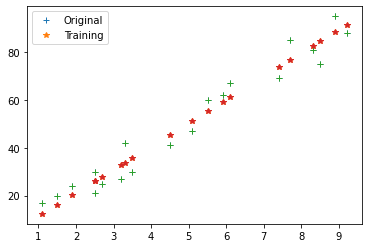

Iteration = 37, Loss = 14.465648532522579


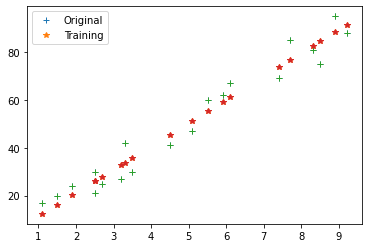

Iteration = 38, Loss = 14.464698712047133


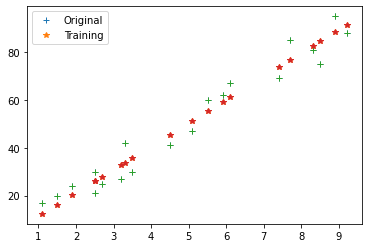

Iteration = 39, Loss = 14.463752865918968


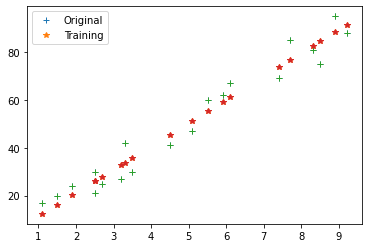

Iteration = 40, Loss = 14.46281097732798


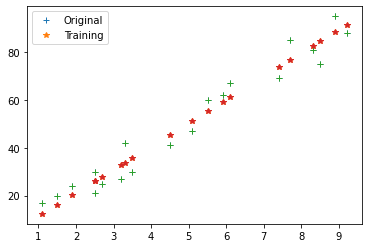

Iteration = 41, Loss = 14.461873029632477


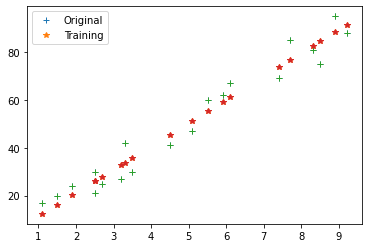

Iteration = 42, Loss = 14.460939006305471


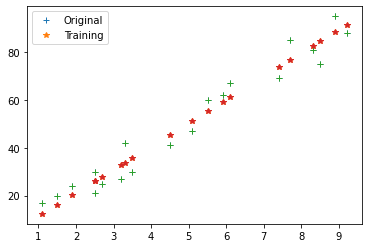

Iteration = 43, Loss = 14.4600088909099


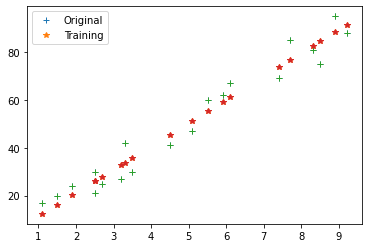

Iteration = 44, Loss = 14.45908266708702


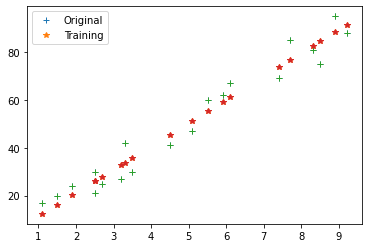

Iteration = 45, Loss = 14.458160318550872


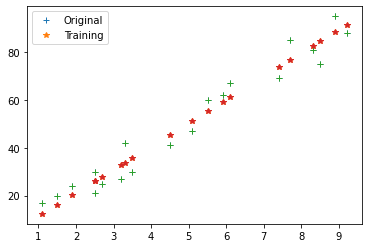

Iteration = 46, Loss = 14.457241829085742


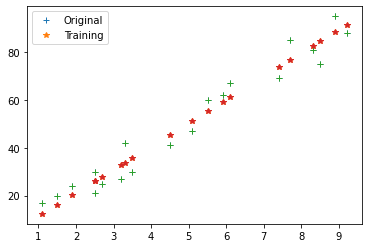

Iteration = 47, Loss = 14.456327182544603


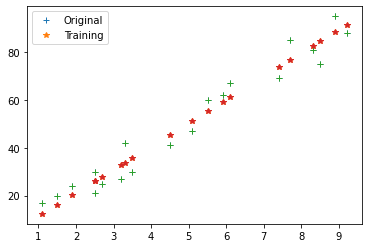

Iteration = 48, Loss = 14.455416362848467


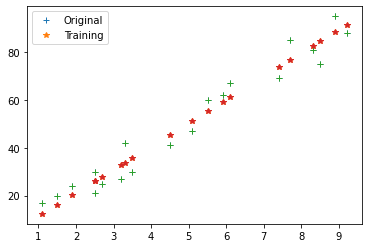

Iteration = 49, Loss = 14.45450935398578


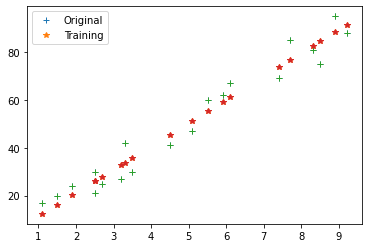

Iteration = 50, Loss = 14.453606140012113


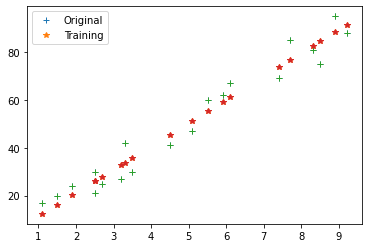

Iteration = 51, Loss = 14.452706705049753


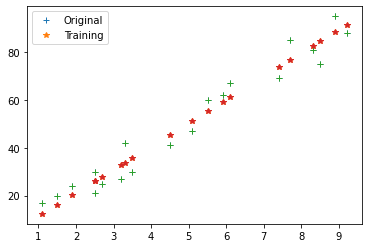

Iteration = 52, Loss = 14.451811033287461


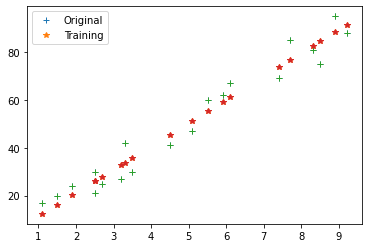

Iteration = 53, Loss = 14.450919108980136


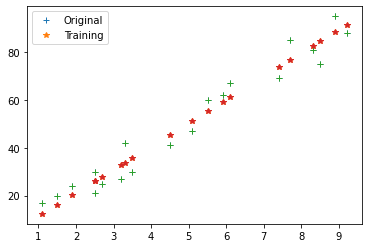

Iteration = 54, Loss = 14.450030916448572


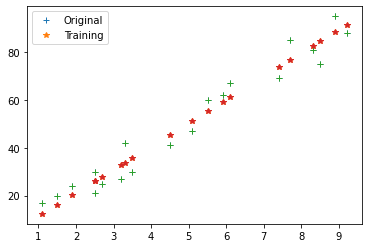

Iteration = 55, Loss = 14.449146440079184


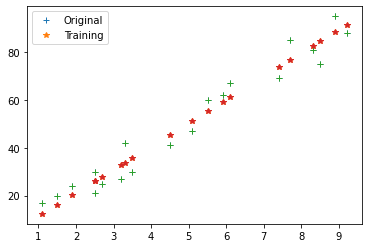

Iteration = 56, Loss = 14.448265664323694


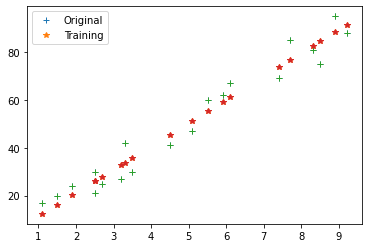

Iteration = 57, Loss = 14.447388573698868


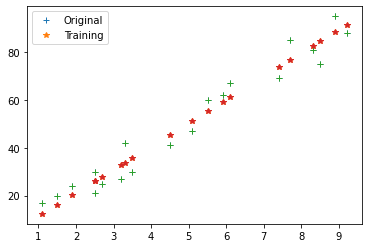

Iteration = 58, Loss = 14.446515152786281


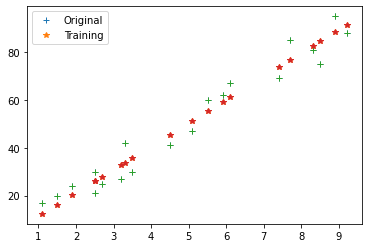

Iteration = 59, Loss = 14.445645386231982


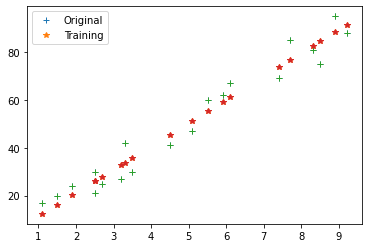

Iteration = 60, Loss = 14.44477925874629


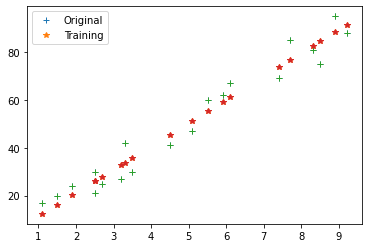

Iteration = 61, Loss = 14.443916755103492


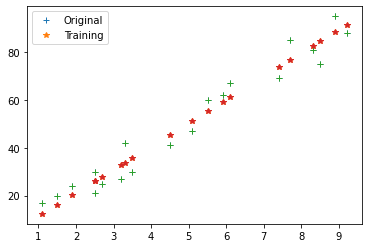

Iteration = 62, Loss = 14.443057860141579


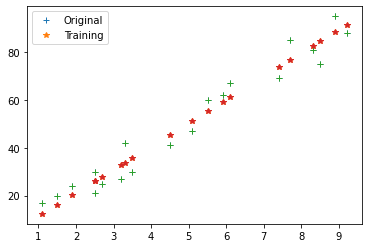

Iteration = 63, Loss = 14.442202558761968


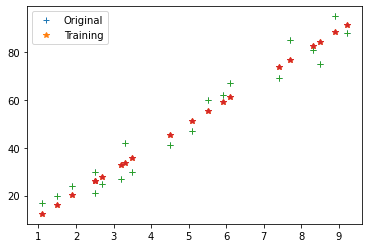

Iteration = 64, Loss = 14.441350835929253


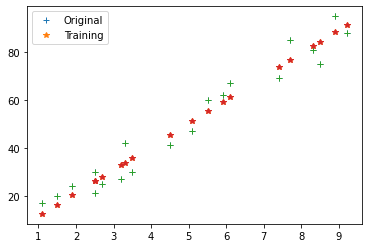

Iteration = 65, Loss = 14.440502676670931


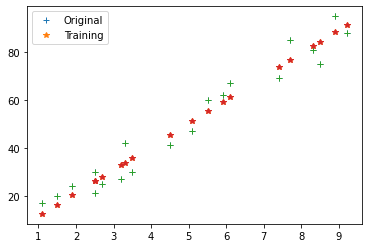

Iteration = 66, Loss = 14.439658066077149


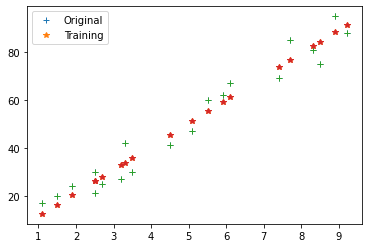

Iteration = 67, Loss = 14.438816989300452


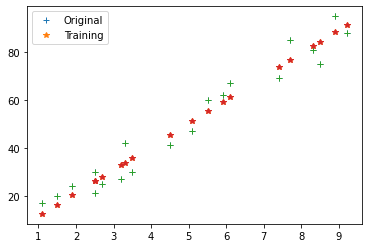

Iteration = 68, Loss = 14.437979431555467


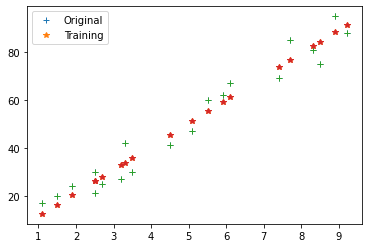

Iteration = 69, Loss = 14.437145378118725


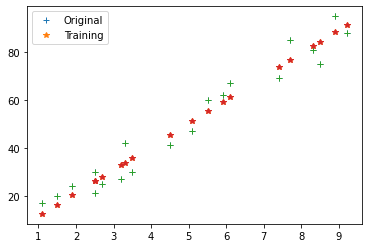

Iteration = 70, Loss = 14.436314814328336


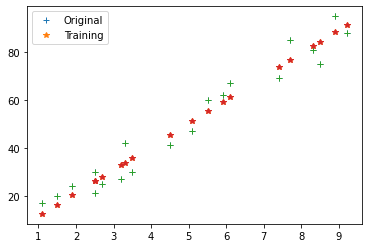

Iteration = 71, Loss = 14.435487725583755


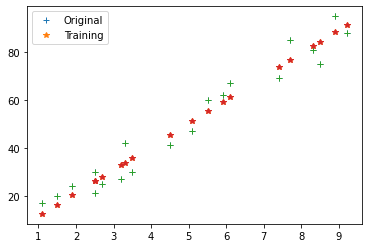

Iteration = 72, Loss = 14.434664097345523


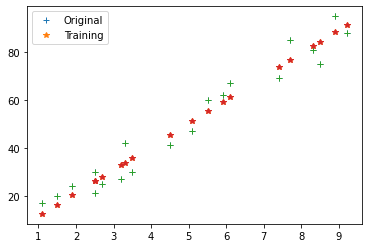

Iteration = 73, Loss = 14.433843915135023


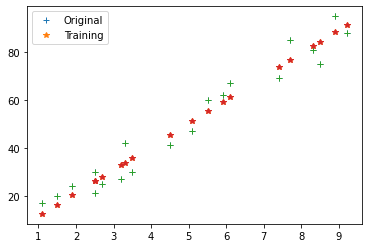

Iteration = 74, Loss = 14.433027164534227


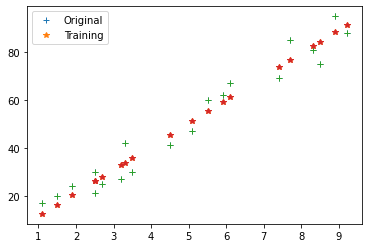

Iteration = 75, Loss = 14.43221383118539


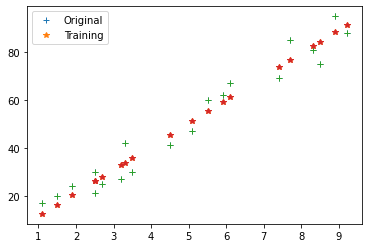

Iteration = 76, Loss = 14.431403900790889


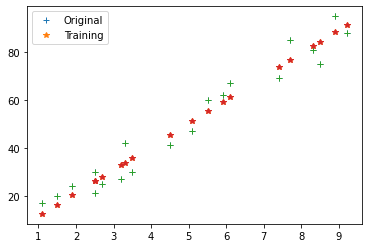

Iteration = 77, Loss = 14.430597359112875


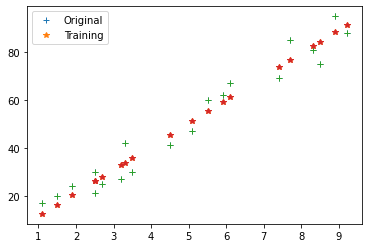

Iteration = 78, Loss = 14.42979419197312


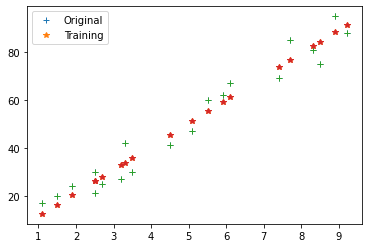

Iteration = 79, Loss = 14.428994385252688


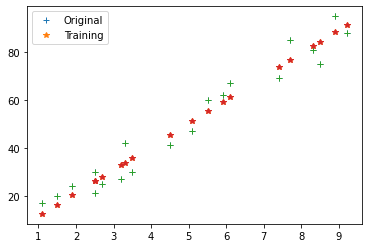

Iteration = 80, Loss = 14.428197924891695


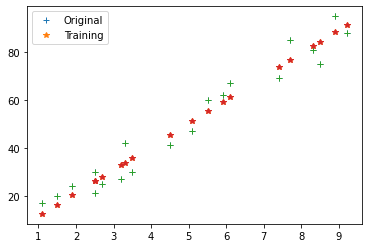

Iteration = 81, Loss = 14.427404796889117


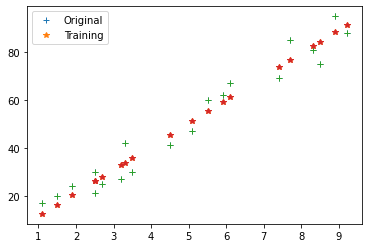

Iteration = 82, Loss = 14.426614987302509


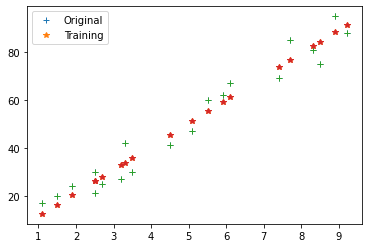

Iteration = 83, Loss = 14.425828482247756


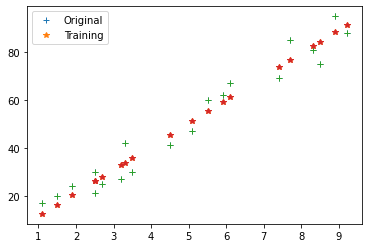

Iteration = 84, Loss = 14.425045267898787


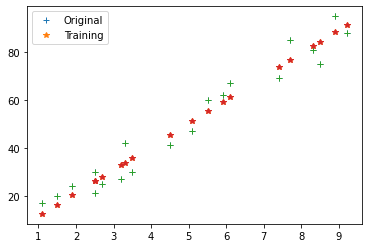

Iteration = 85, Loss = 14.424265330487472


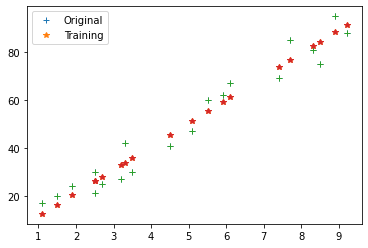

Iteration = 86, Loss = 14.423488656303212


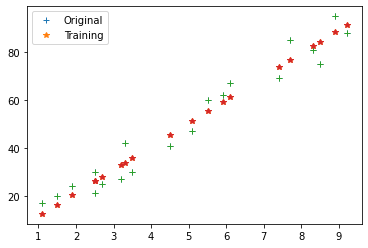

Iteration = 87, Loss = 14.422715231692788


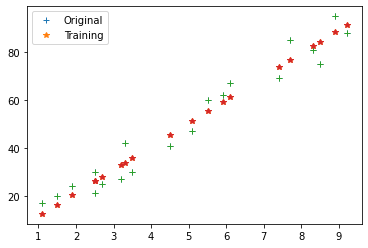

Iteration = 88, Loss = 14.421945043060125


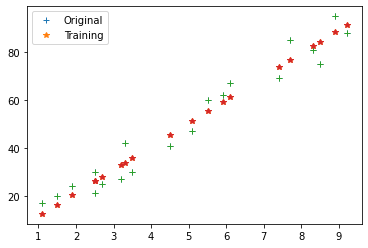

Iteration = 89, Loss = 14.421178076866008


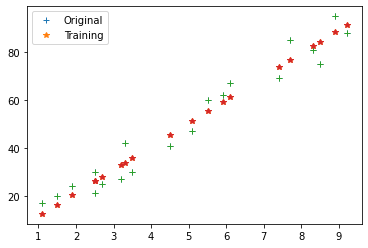

Iteration = 90, Loss = 14.420414319627895


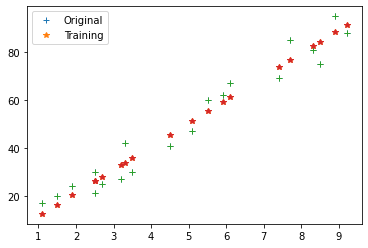

Iteration = 91, Loss = 14.419653757919642


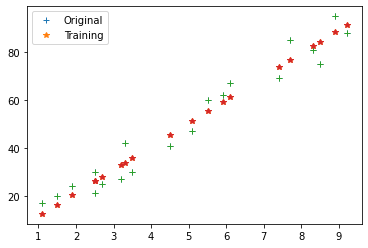

Iteration = 92, Loss = 14.418896378371262


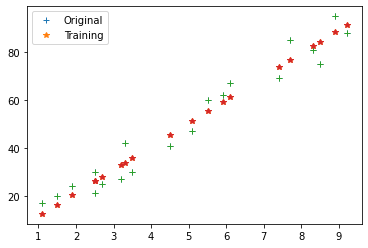

Iteration = 93, Loss = 14.418142167668748


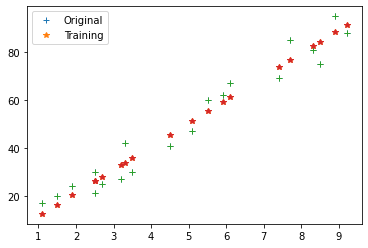

Iteration = 94, Loss = 14.417391112553755


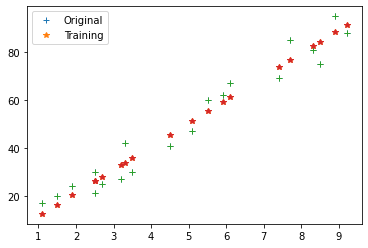

Iteration = 95, Loss = 14.416643199823445


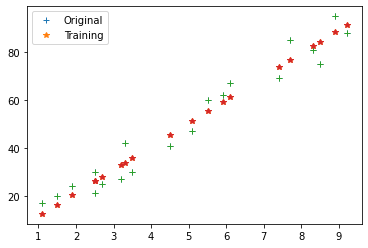

Iteration = 96, Loss = 14.415898416330204


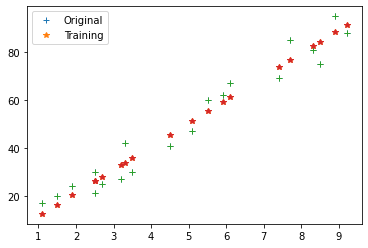

Iteration = 97, Loss = 14.415156748981422


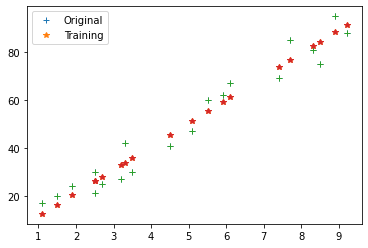

Iteration = 98, Loss = 14.414418184739276


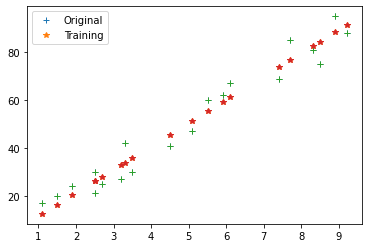

Iteration = 99, Loss = 14.413682710620495


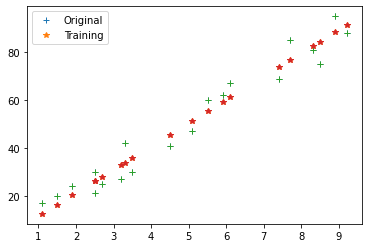

Iteration = 100, Loss = 14.412950313696133


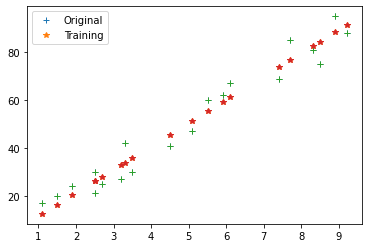

In [71]:
parameters, loss = train(train_input, train_output, 0.01, 100)

{'m': 9.722855014288191, 'c': 1.7597422287128204}


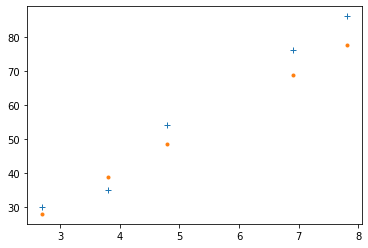

34.095343479758434

In [72]:
print(parameters)
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

cost_function(test_predictions, test_output)
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test_predictions, test_output)

error

In [73]:
x = float(input("Enter Hours : "))
x= np.array([x]).reshape(1,1)
predictions = x * parameters["m"] + parameters["c"]

Enter Hours : 9.25


In [74]:
predictions

array([[91.69615111]])

In [76]:
print('predicted score = ', format(predictions[0]))

predicted score =  [91.69615111]


# COMPLETED